In [1]:
import tensorflow as tf
import random
print(tf.__version__)

2.9.0


In [2]:
train_dir = 'tourism_destination_2/tourism_destination/train_data/'
validation_dir = 'tourism_destination_2/tourism_destination/validation_data/'

In [3]:
ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator
#Using ImageDataGenerator to ease Data preparation as it lables images based on Folder Name which is ideal for the way Data Set is arranged
TRAINING_DIR = train_dir
# Data Augmentation
train_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = validation_dir
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))


Found 1240 images belonging to 16 classes.
Found 273 images belonging to 16 classes.


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(16, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [5]:
history = model.fit_generator(train_generator,
                              epochs=150,
                              verbose=1,
                              validation_data=validation_generator)

C:\Users\CATURW~1\AppData\Local\Temp/ipykernel_24392/337946350.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/150
13/13 [==============================] - 17s 1s/step - loss: 2.7071 - accuracy: 0.1250 - val_loss: 2.6427 - val_accuracy: 0.1099
Epoch 2/150
13/13 [==============================] - 15s 1s/step - loss: 2.6342 - accuracy: 0.1516 - val_loss: 2.4916 - val_accuracy: 0.2125
Epoch 3/150
13/13 [==============================] - 15s 1s/step - loss: 2.4633 - accuracy: 0.2202 - val_loss: 2.2344 - val_accuracy: 0.2454
Epoch 4/150
13/13 [==============================] - 14s 1s/step - loss: 2.3728 - accuracy: 0.2427 - val_loss: 2.1468 - val_accuracy: 0.3407
Epoch 5/150
13/13 [==============================] - 15s 1s/step - loss: 2.2355 - accuracy: 0.2815 - val_loss: 1.9164 - val_accuracy: 0.3626
Epoch 6/150
13/13 [==============================] - 15s 1s/step - loss: 2.0737 - accuracy: 0.3290 - val_loss: 1.8088 - val_accuracy: 0.4322
Epoch 7/150
13/13 [==============================] - 15s 1s/step - loss: 2.0137 - accuracy: 0.3823 - val_loss: 1.5310 - val_accuracy: 0.5568
Epoch 8/150
1

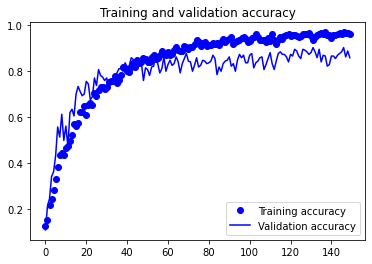

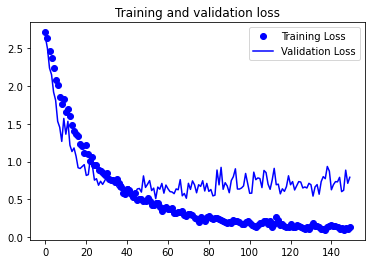

In [6]:
import matplotlib.pyplot as plt
# plot the summary training
def plot_loss_acc(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_loss_acc(history)

In [7]:
                              
model.save('CNNmodelV3.h5')

In [8]:
from keras.callbacks import History

# Create an instance of the History callback
history_callback = History()

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

image = keras.preprocessing.image
model = keras.models.load_model('CNNmodelV3.h5')
#path to any image to be predicted
path = './tourism_destination_2/testing_image/taman_sangkreang (71).jpg'
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
#[x] can be an array of images 
# images = np.vstack([x])

test_labels = [
            'borobudur',
            'jendral_sudirman',
            'martapura',
            'monas',
            'monumen_lobar',
            'monumen mataram metro',
            'monumen_selamat_datang',
            'monumen_surabaya',
            'museum_tsunami',
            'pantai_penyu',
            'prambanan',
            'pura_suranadi',
            'rumah_aceh',
            'sarinah_ mall',
            'taman_sangkreang',
            'tugu_jogja',
        ]

classes = model.predict(x, batch_size=10)
predicted = np.argmax(classes)
print(predicted)
# Desired output. Charts with training and validation metrics. No crash :)

1/1 [==============================] - 0s 120ms/step
5


NameError: name 'history' is not defined